In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import PIL.Image as Image
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [2]:
IMAGE_SHAPE = (224, 224)
classifier = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

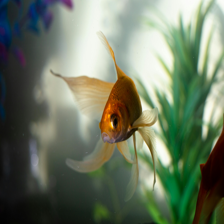

In [3]:
gold_fish = Image.open("goldfish.jpg.jpg").resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish[np.newaxis,].shape
# here adding new axis cause y_pred accept multiple inputs to predict but
#--here it's only one

(1, 224, 224, 3)

In [10]:
result = classifier.predict(gold_fish[np.newaxis,])
result

1/1 [==============================] - 0s 286ms/step


array([[ 0.28703368,  1.4896355 ,  8.118902  , ..., -0.5151296 ,
        -0.01969781, -0.20084886]], dtype=float32)

In [11]:
result.shape

(1, 1001)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [14]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')


10484/10484 [==============================] - 0s 2us/step


'C:\\Users\\soura\\.keras\\datasets\\ImageNetLabels.txt'

In [19]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [20]:
image_labels[predicted_label_index]

'goldfish'